In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Load the data file

In [3]:
mc=pd.read_csv('Data file.csv')
mc.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
mc.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

#### Column Names Description

label: Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}

msisdn: mobile number of user

aon: age on cellular network in days

daily_decr30: Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

daily_decr90: Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

rental30: Average main account balance over last 30 days

rental90: Average main account balance over last 90 days

last_rech_date_ma: Number of days till last recharge of main account

last_rech_date_da: Number of days till last recharge of data account

last_rech_amt_ma: Amount of last recharge of main account (in Indonesian Rupiah)

cnt_ma_rech30: Number of times main account got recharged in last 30 days

fr_ma_rech30: Frequency of main account recharged in last 30 days

sumamnt_ma_rech30: Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

medianamnt_ma_rech30: Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)

medianmarechprebal30: Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)

cnt_ma_rech90: Number of times main account got recharged in last 90 days

fr_ma_rech90: Frequency of main account recharged in last 90 days

sumamnt_ma_rech90: Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)

medianamnt_ma_rech90: Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)

medianmarechprebal90: Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

cnt_da_rech30: Number of times data account got recharged in last 30 days

fr_da_rech30: Frequency of data account recharged in last 30 days

cnt_da_rech90: Number of times data account got recharged in last 90 days

fr_da_rech90: Frequency of data account recharged in last 90 days

cnt_loans30: Number of loans taken by user in last 30 days

amnt_loans30: Total amount of loans taken by user in last 30 days

maxamnt_loans30: maximum amount of loan taken by the user in last 30 days

medianamnt_loans30: Median of amounts of loan taken by the user in last 30 days

cnt_loans90: Number of loans taken by user in last 90 days

amnt_loans90: Total amount of loans taken by user in last 90 days

maxamnt_loans90: maximum amount of loan taken by the user in last 90 days

medianamnt_loans90: Median of amounts of loan taken by the user in last 90 days

payback30: Average payback time in days over last 30 days

payback90: Average payback time in days over last 90 days

pcircle: telecom circle

pdate: date

In [5]:
mc.shape

(209593, 37)

There are 209593 rows and 37 columns including target column.

In [6]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [7]:
mc.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [8]:
mc.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

There are no null values in the above datafile.

In [9]:
mc['label'].unique()

array([0, 1], dtype=int64)

In [10]:
mc['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

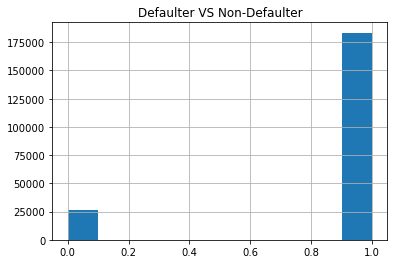

In [11]:
mc['label'].hist(grid=True)
plt.title("Defaulter VS Non-Defaulter")
plt.show()

The data is imbalanced.

#### Removing columns which are not affect the target column

In [12]:
mc.drop(['Unnamed: 0','msisdn','pdate','pcircle'],axis=1, inplace=True)

In [13]:
mc.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

### Checking Correlation

In [14]:
corr_mat=mc.corr()
corr_mat

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


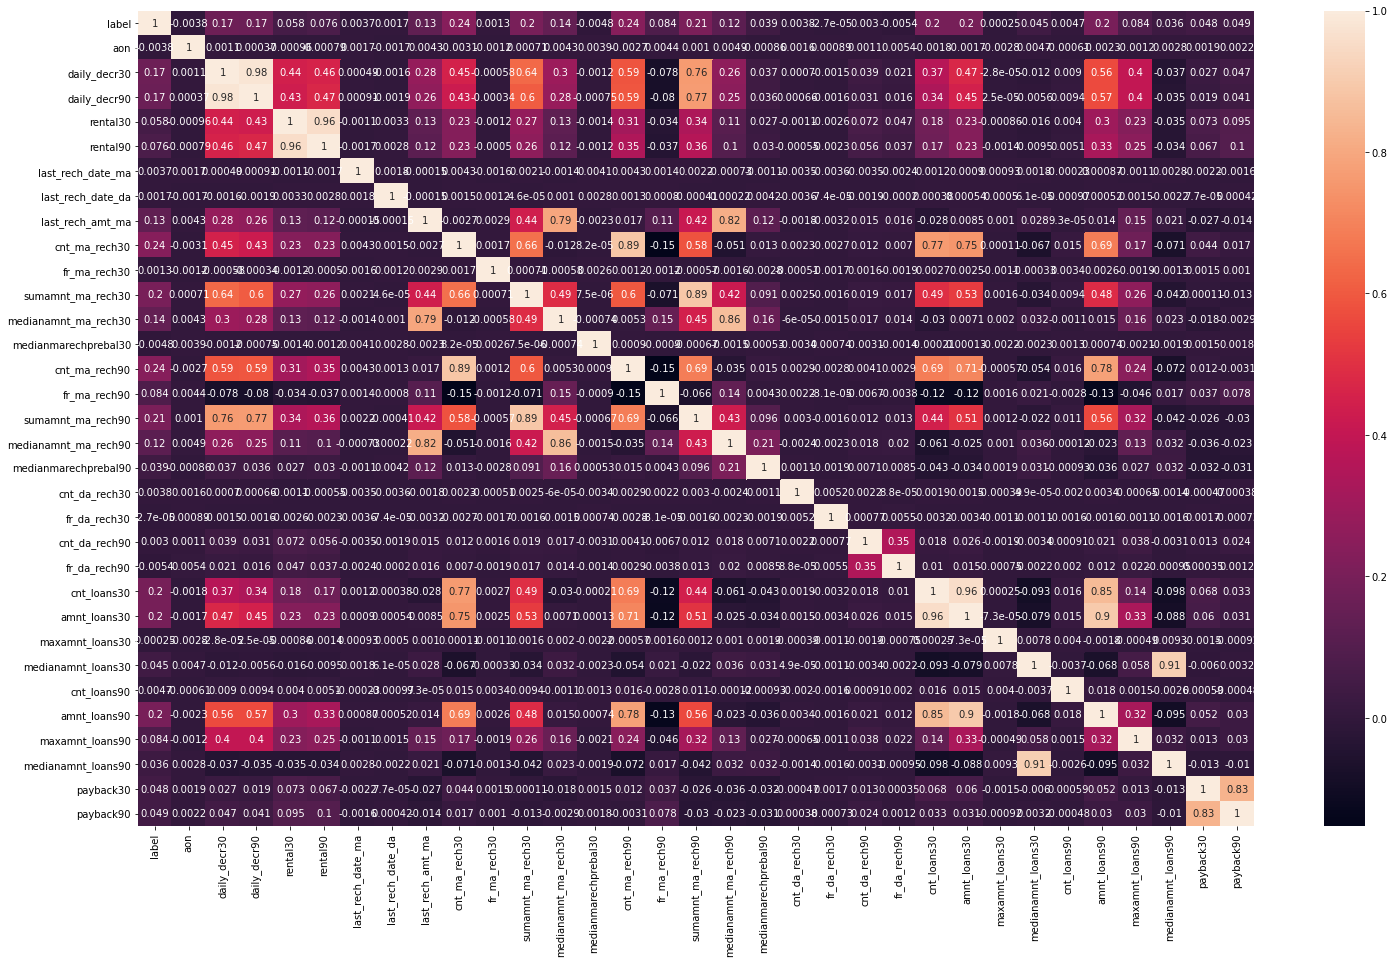

In [15]:
#checking heatmap for correlation

plt.figure(figsize=(25,15))
sns.heatmap(corr_mat,annot=True)
plt.show()

### Lets check the data distribution among all the columns 

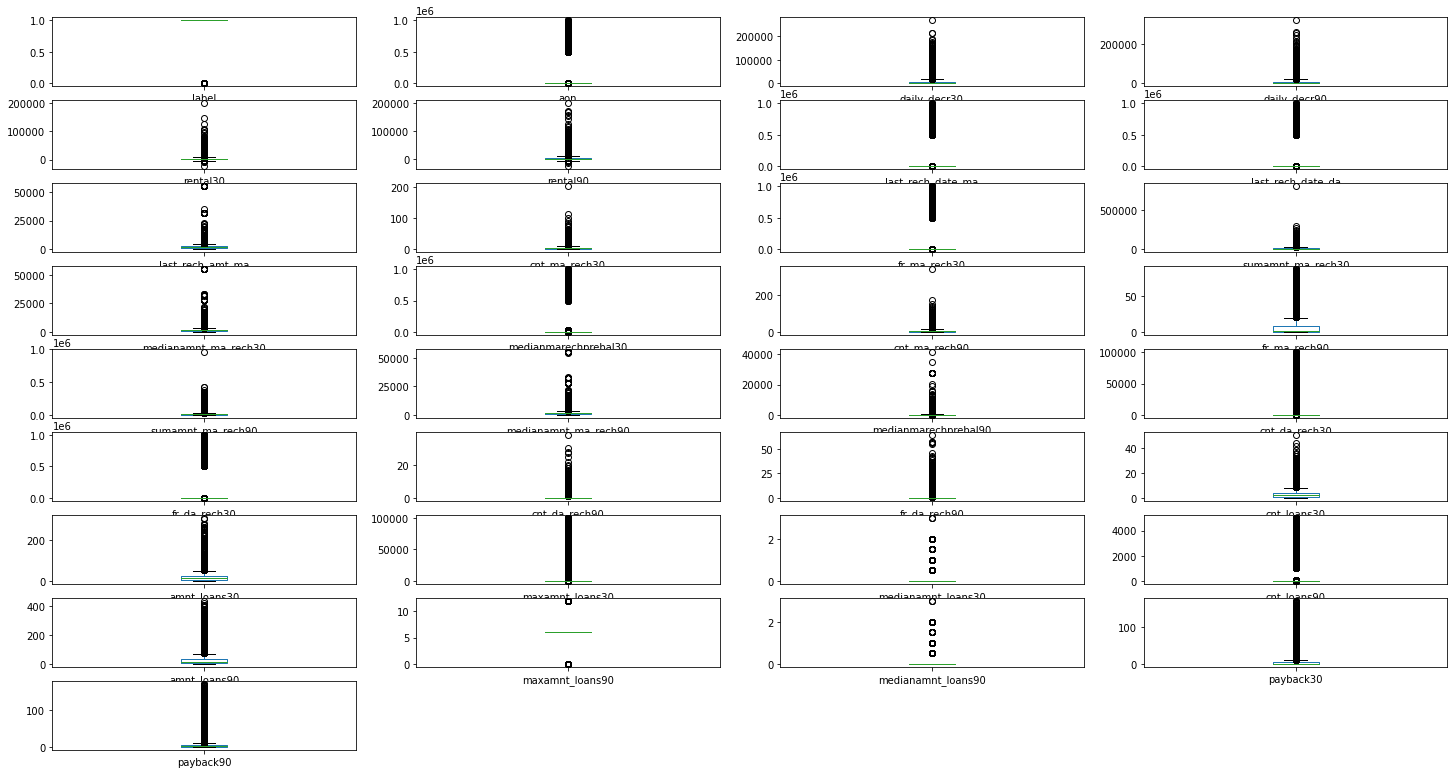

In [16]:
mc.plot(kind='box',subplots= True,layout=(10,4),figsize=(25,15))
plt.show()

###### There are lot of outliers in each column.

#### Removing Outliers

In [17]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(mc))
threshold=3
np.where(z>3)

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64),
 array([15, 15, 32, ..., 28, 26, 30], dtype=int64))

In [18]:
new_mc=mc[(z<3).all(axis=1)]
new_mc

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


In [19]:
mc.shape

(209593, 33)

In [20]:
new_mc.shape

(161465, 33)

In [21]:
percentage_loss=((209593-161465)/209593)*100
print(percentage_loss)

22.962598941758554


we are not removing outliers as we will lose huge data.

In [22]:
#splitting the independent and target variables in x and y
x=mc.drop('label',axis=1)
y=mc["label"]

In [23]:
print(x.shape)
print(y.shape)

(209593, 32)
(209593,)


In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.10357685, -0.25229941, -0.27634619, ..., -0.22959366,
         2.9046997 ,  2.39409346],
       [-0.09776412,  0.73103667,  0.5533797 , ..., -0.22959366,
        -0.38562959, -0.41923266],
       [-0.10010243, -0.43201111, -0.42903256, ..., -0.22959366,
        -0.38562959, -0.41923266],
       ...,
       [-0.09378769,  0.70079045,  0.53319431, ..., -0.22959366,
         0.06820893, -0.04735622],
       [-0.08428915,  0.77075515,  0.59455827, ..., -0.22959366,
        -0.38562959,  0.59938541],
       [-0.08628398, -0.09674426, -0.14174607, ..., -0.22959366,
        -0.38562959, -0.41923266]])

## Exploratory Data Analysis

In [25]:
mc.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

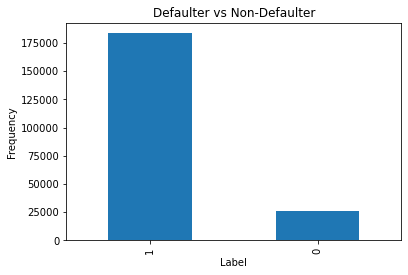

In [26]:
count_classes=pd.value_counts(mc['label'],sort=True)
count_classes.plot(kind='bar')
plt.title("Defaulter vs Non-Defaulter")
plt.xlabel('Label')
plt.ylabel('Frequency')

In [27]:
#Get the defaulter and Non-defaulter 

defaulter=mc[mc["label"]==1]
non_defaulter=mc[mc['label']==0]
print(defaulter.shape,non_defaulter.shape)

(183431, 33) (26162, 33)


In [28]:

from imblearn.under_sampling import NearMiss

In [29]:
nm = NearMiss()
x_train_miss, y_train_miss = nm.fit_sample(x, y)

AttributeError: 'NearMiss' object has no attribute 'fit_sample'

In [ ]:
print('After Undersampling, the shape of train_X: {}'.format(x_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))

In [ ]:
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

In [ ]:
x=x_train_miss
y=y_train_miss

# Find Best Random State


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [30]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"n Random_state",maxRS)

NameError: name 'train_test_split' is not defined

#### We have found best random_state value as 80. We will create our train_test_split using random_state(80)

In [31]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=80)

In [40]:
def eval(x):
    mod=x
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [41]:
eval(LogisticRegression())

0.6965218499171869
[[3969 3809]
 [ 955 6965]]
              precision    recall  f1-score   support

           0       0.81      0.51      0.62      7778
           1       0.65      0.88      0.75      7920

    accuracy                           0.70     15698
   macro avg       0.73      0.69      0.69     15698
weighted avg       0.73      0.70      0.69     15698



In [42]:
eval(SVC())

0.7082430882915021
[[3732 4046]
 [ 534 7386]]
              precision    recall  f1-score   support

           0       0.87      0.48      0.62      7778
           1       0.65      0.93      0.76      7920

    accuracy                           0.71     15698
   macro avg       0.76      0.71      0.69     15698
weighted avg       0.76      0.71      0.69     15698



In [43]:
eval(DecisionTreeClassifier())

0.7723913874378902
[[5977 1801]
 [1772 6148]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      7778
           1       0.77      0.78      0.77      7920

    accuracy                           0.77     15698
   macro avg       0.77      0.77      0.77     15698
weighted avg       0.77      0.77      0.77     15698



In [44]:
eval(KNeighborsClassifier())

0.7421964581475348
[[5475 2303]
 [1744 6176]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73      7778
           1       0.73      0.78      0.75      7920

    accuracy                           0.74     15698
   macro avg       0.74      0.74      0.74     15698
weighted avg       0.74      0.74      0.74     15698



In [45]:
eval(RandomForestClassifier())

0.8281309720983565
[[6340 1438]
 [1260 6660]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      7778
           1       0.82      0.84      0.83      7920

    accuracy                           0.83     15698
   macro avg       0.83      0.83      0.83     15698
weighted avg       0.83      0.83      0.83     15698



In [46]:
eval(AdaBoostClassifier())

0.8032870429354058
[[5761 2017]
 [1071 6849]]
              precision    recall  f1-score   support

           0       0.84      0.74      0.79      7778
           1       0.77      0.86      0.82      7920

    accuracy                           0.80     15698
   macro avg       0.81      0.80      0.80     15698
weighted avg       0.81      0.80      0.80     15698



In [47]:
eval(GradientBoostingClassifier())

0.8152630908395974
[[5839 1939]
 [ 961 6959]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80      7778
           1       0.78      0.88      0.83      7920

    accuracy                           0.82     15698
   macro avg       0.82      0.81      0.81     15698
weighted avg       0.82      0.82      0.81     15698



In [48]:
eval(BaggingClassifier())

0.8042425786724423
[[6359 1419]
 [1654 6266]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      7778
           1       0.82      0.79      0.80      7920

    accuracy                           0.80     15698
   macro avg       0.80      0.80      0.80     15698
weighted avg       0.80      0.80      0.80     15698



###  Checking Cross Validation Score

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
scr=cross_val_score(LogisticRegression(),x,y,cv=5)
print("Cross Validation Score for LogisticRegression model",scr.mean())

Cross Validation Score for LogisticRegression model 0.5818339035316499


In [51]:
scr=cross_val_score(SVC(),x,y,cv=5)
print("Cross Validation Score for SVC model",scr.mean())

Cross Validation Score for SVC model 0.5893837493114518


In [52]:
scr=cross_val_score(DecisionTreeClassifier(),x,y,cv=5)
print("Cross Validation Score for DecisionTreeClassifier model",scr.mean())

Cross Validation Score for DecisionTreeClassifier model 0.6469112346236399


In [53]:
scr=cross_val_score(KNeighborsClassifier(),x,y,cv=5)
print("Cross Validation Score for KNeighborsClassifier model",scr.mean())

Cross Validation Score for KNeighborsClassifier model 0.5473221408627272


In [54]:
scr=cross_val_score(RandomForestClassifier(),x,y,cv=5)
print("Cross Validation Score for RandomForestClassifier model",scr.mean())

Cross Validation Score for RandomForestClassifier model 0.6726351746246042


In [55]:
scr=cross_val_score(AdaBoostClassifier(),x,y,cv=5)
print("Cross Validation Score for AdaBoostClassifier model",scr.mean())

Cross Validation Score for AdaBoostClassifier model 0.749041144502353


In [56]:
scr=cross_val_score(GradientBoostingClassifier(),x,y,cv=5)
print("Cross Validation Score for GradientBoostingClassifier model",scr.mean())

Cross Validation Score for GradientBoostingClassifier model 0.7417411869476089


In [57]:
scr=cross_val_score(BaggingClassifier(),x,y,cv=5)
print("Cross Validation Score for BaggingClassifier model",scr.mean())

Cross Validation Score for BaggingClassifier model 0.6785789386786594


***Minimum difference in accuracy and cross validation score is for AdaBoostClassifier. So AdaBoostClassifier is our best model***

# Hyper Tuning the Model

In [63]:
from sklearn.model_selection import GridSearchCV

In [62]:
#AdaBoostClassifier

parameters={'n_estimators':range(5,20),'algorithm':('SAMME','SAMME.R'),'random_state': range(20,40)}



In [64]:
ABC=GridSearchCV(AdaBoostClassifier(),parameters,cv=5)


In [65]:
ABC.fit(x_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ('SAMME', 'SAMME.R'),
                         'n_estimators': range(5, 20),
                         'random_state': range(20, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [66]:
ABC.best_params_

{'algorithm': 'SAMME.R', 'n_estimators': 19, 'random_state': 20}

In [67]:
mod=AdaBoostClassifier(algorithm= 'SAMME.R', n_estimators= 19,random_state=20)
mod.fit(x_train,y_train)

pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

78.97184354694866


### AUC RUC Curve

In [68]:
from sklearn.metrics import plot_roc_curve

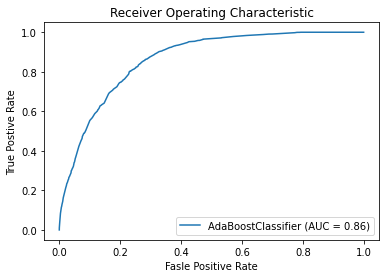

In [70]:
plot_roc_curve(mod,x_test,y_test)
plt.title("Receiver Operating Characteristic")
plt.xlabel("Fasle Positive Rate")
plt.ylabel("True Postive Rate")
plt.show()

In [73]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score,precision_score

In [76]:
model=AdaBoostClassifier()
model.fit(x_train,y_train)
print(model)
pre=model.predict(x_test)  
AS=accuracy_score(y_test,pre)
sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
recall = recall_score(y_test,pre, average='binary')
precision = precision_score(y_test,pre, average='binary')
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
roc_auc=auc(false_positive_rate,true_positive_rate)
cm=confusion_matrix(y_test,pre)
cm=confusion_matrix(y_test,pre)
print('Accuracy_score =\n',AS)
    

print('Cross_Val_Score =\n',sc)
    

print('Recall =\n', recall)
   

print('Precision: %.3f\n' % precision)
    

print('roc_auc_score= \n',roc_auc)

    
print('classification_report\n',classification_report(y_test,pre))
    
cm=confusion_matrix(y_test,pre)
print(cm)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
Accuracy_score =
 0.8032870429354058
Cross_Val_Score =
 0.7778998881480794
Recall =
 0.8647727272727272
Precision: 0.773

roc_auc_score= 
 0.8027257825101101
classification_report
               precision    recall  f1-score   support

           0       0.84      0.74      0.79      7778
           1       0.77      0.86      0.82      7920

    accuracy                           0.80     15698
   macro avg       0.81      0.80      0.80     15698
weighted avg       0.81      0.80      0.80     15698

[[5761 2017]
 [1071 6849]]


## Saving a Model

In [79]:
import pickle
filename = 'micro_credit_finance.csv.pkl'
pickle.dump(ABC,open(filename,'wb'))

## Conclusion

In [80]:
Final=np.array(y_test)
Final

array([0, 0, 1, ..., 0, 0, 0])

In [83]:
predict=np.array(ABC.predict(x_test))

In [84]:
mc_pred=pd.DataFrame({"original":Final,"predicted":predict},index=range(len(Final)))

In [85]:
mc_pred

,original,predicted
0,0,0
1,0,0
2,1,0
3,1,1
4,0,0
...,...,...
15693,1,1
15694,1,1
15695,0,1
15696,0,1
